In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from scipy import optimize

import sys
sys.path.insert(0,'/home/pawel1/Pulpit/Astrophysics/CTA/soft/ctapipe_io_lst')
sys.path.insert(0, '/home/pawel1/Pulpit/Astrophysics/CTA/cta-lstchain')
from ctapipe_io_lst import LSTEventSource

from ctapipe.io import EventSeeker
from traitlets.config.loader import Config 
from DRS4Corr import DRS4Corrections

from lstchain.calib.camera.r0 import LSTR0Corrections
from matplotlib.colors import LogNorm

plt.rcParams.update({'font.size': 45})

In [3]:
def get_first_capacitor(event, nr_module):
        """
        Get first capacitor values from event for nr module.
        Parameters
        ----------
        event : `ctapipe` event-container
        nr_module : number of module
        """
        high_gain = 0
        low_gain = 1
        fc = np.zeros((2, 7))
        first_cap = event.lst.tel[0].evt.first_capacitor_id[nr_module * 8:
                                                            (nr_module + 1) * 8]
        for i, j in zip([0, 1, 2, 3, 4, 5, 6], [0, 0, 1, 1, 2, 2, 3]):
            fc[high_gain, i] = first_cap[j]
        for i, j in zip([0, 1, 2, 3, 4, 5, 6], [4, 4, 5, 5, 6, 6, 7]):
            fc[low_gain, i] = first_cap[j]
        return fc
    
def ped_time(timediff):
    """
    Power law function for time lapse baseline correction.
    Coefficients from curve fitting to dragon test data
    at temperature 40 degC
    """
    return 23.03 * np.power(timediff, -0.25) - 9.73

power_law = lambda p, dt: p[0]*dt**p[1] + p[2]
errfunc = lambda p, x, y: power_law(p, x) - y

In [5]:
reader = LSTEventSource(input_url="/media/pawel1/ADATA HD330/20190215/LST-1.*.Run00097.0001.fits.fz",
                        max_events=1000)

config = Config({
    "LSTR0Corrections": {
        "pedestal_path": "/media/pawel1/ADATA HD330/20190215/pedestal_run97_new.fits",
        "offset":  300,
        "tel_id": 0
    }
})
lst_r0 = LSTR0Corrections(config=config)


last_time_array = np.zeros(4096)
size4drs = 4096
dt = []
baseline = []
baseline_corr = []
nr_module = 115
pix = 2
for i, event in enumerate(reader):
    print("i = {}, event id = {}".format(i, event.r0.event_id))
    lst_r0.subtract_pedestal(event)
    lst_r0.interpolate_spikes(event)
    expected_pixel_id = event.lst.tel[0].svc.pixel_ids
    pixel = expected_pixel_id[nr_module*7 + pix]
    EVB = event.lst.tel[0].evt.local_clock_counter
    time_now = EVB[nr_module]
    fc = get_first_capacitor(event, nr_module)
    for k in range(0, 40):
            posads = int((k + fc[0, pix]) % size4drs)
            if last_time_array[posads] > 0:
                time_diff = time_now - last_time_array[posads]
                if k > 2 and k < 38:
                        #print(time_diff)
                        dt.append(time_diff/133.e3)
                        baseline.append(event.r1.tel[0].waveform[0, pixel, k])
                        val = event.r1.tel[0].waveform[0, pixel, k] - ped_time(time_diff / (133.e3))
                        baseline_corr.append(val)
            if (k < 39):
                last_time_array[posads] = time_now

i = 0, event id = 53005
i = 1, event id = 53006
i = 2, event id = 53007
i = 3, event id = 53008
i = 4, event id = 53009
i = 5, event id = 53010
i = 6, event id = 53011
i = 7, event id = 53012
i = 8, event id = 53013
i = 9, event id = 53014
i = 10, event id = 53015
i = 11, event id = 53016
i = 12, event id = 53017
i = 13, event id = 53018
i = 14, event id = 53019
i = 15, event id = 53020
i = 16, event id = 53021
i = 17, event id = 53022
i = 18, event id = 53023
i = 19, event id = 53024
i = 20, event id = 53025
i = 21, event id = 53026
i = 22, event id = 53027
i = 23, event id = 53028
i = 24, event id = 53029
i = 25, event id = 53030
i = 26, event id = 53031
i = 27, event id = 53032
i = 28, event id = 53033
i = 29, event id = 53034
i = 30, event id = 53035
i = 31, event id = 53036
i = 32, event id = 53037
i = 33, event id = 53038
i = 34, event id = 53039
i = 35, event id = 53040
i = 36, event id = 53041
i = 37, event id = 53042
i = 38, event id = 53043
i = 39, event id = 53044
i = 40, ev

i = 326, event id = 53331
i = 327, event id = 53332
i = 328, event id = 53333
i = 329, event id = 53334
i = 330, event id = 53335
i = 331, event id = 53336
i = 332, event id = 53337
i = 333, event id = 53338
i = 334, event id = 53339
i = 335, event id = 53340
i = 336, event id = 53341
i = 337, event id = 53342
i = 338, event id = 53343
i = 339, event id = 53344
i = 340, event id = 53345
i = 341, event id = 53346
i = 342, event id = 53347
i = 343, event id = 53348
i = 344, event id = 53349
i = 345, event id = 53350
i = 346, event id = 53351
i = 347, event id = 53352
i = 348, event id = 53353
i = 349, event id = 53354
i = 350, event id = 53355
i = 351, event id = 53356
i = 352, event id = 53357
i = 353, event id = 53358
i = 354, event id = 53359
i = 355, event id = 53360
i = 356, event id = 53361
i = 357, event id = 53362
i = 358, event id = 53363
i = 359, event id = 53364
i = 360, event id = 53365
i = 361, event id = 53366
i = 362, event id = 53367
i = 363, event id = 53368
i = 364, eve

i = 649, event id = 53654
i = 650, event id = 53655
i = 651, event id = 53656
i = 652, event id = 53657
i = 653, event id = 53658
i = 654, event id = 53659
i = 655, event id = 53660
i = 656, event id = 53661
i = 657, event id = 53662
i = 658, event id = 53663
i = 659, event id = 53664
i = 660, event id = 53665
i = 661, event id = 53666
i = 662, event id = 53667
i = 663, event id = 53668
i = 664, event id = 53669
i = 665, event id = 53670
i = 666, event id = 53671
i = 667, event id = 53672
i = 668, event id = 53673
i = 669, event id = 53674
i = 670, event id = 53675
i = 671, event id = 53676
i = 672, event id = 53677
i = 673, event id = 53678
i = 674, event id = 53679
i = 675, event id = 53680
i = 676, event id = 53681
i = 677, event id = 53682
i = 678, event id = 53683
i = 679, event id = 53684
i = 680, event id = 53685
i = 681, event id = 53686
i = 682, event id = 53687
i = 683, event id = 53688
i = 684, event id = 53689
i = 685, event id = 53690
i = 686, event id = 53691
i = 687, eve

i = 970, event id = 53975
i = 971, event id = 53976
i = 972, event id = 53977
i = 973, event id = 53978
i = 974, event id = 53979
i = 975, event id = 53980
i = 976, event id = 53981
i = 977, event id = 53982
i = 978, event id = 53983
i = 979, event id = 53984
i = 980, event id = 53985
i = 981, event id = 53986
i = 982, event id = 53987
i = 983, event id = 53988
i = 984, event id = 53989
i = 985, event id = 53990
i = 986, event id = 53991
i = 987, event id = 53992
i = 988, event id = 53993
i = 989, event id = 53994
i = 990, event id = 53995
i = 991, event id = 53996
i = 992, event id = 53997
i = 993, event id = 53998
i = 994, event id = 53999
i = 995, event id = 54000
i = 996, event id = 54001
i = 997, event id = 54002
i = 998, event id = 54003
i = 999, event id = 54004


In [6]:
p0 = [29., -0.2, -12.] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(dt, np.array(baseline)))
print(p1)
#y = power_law(p1, t)

[ 3.36300179e+01 -2.17042197e-01  2.83217187e+02]


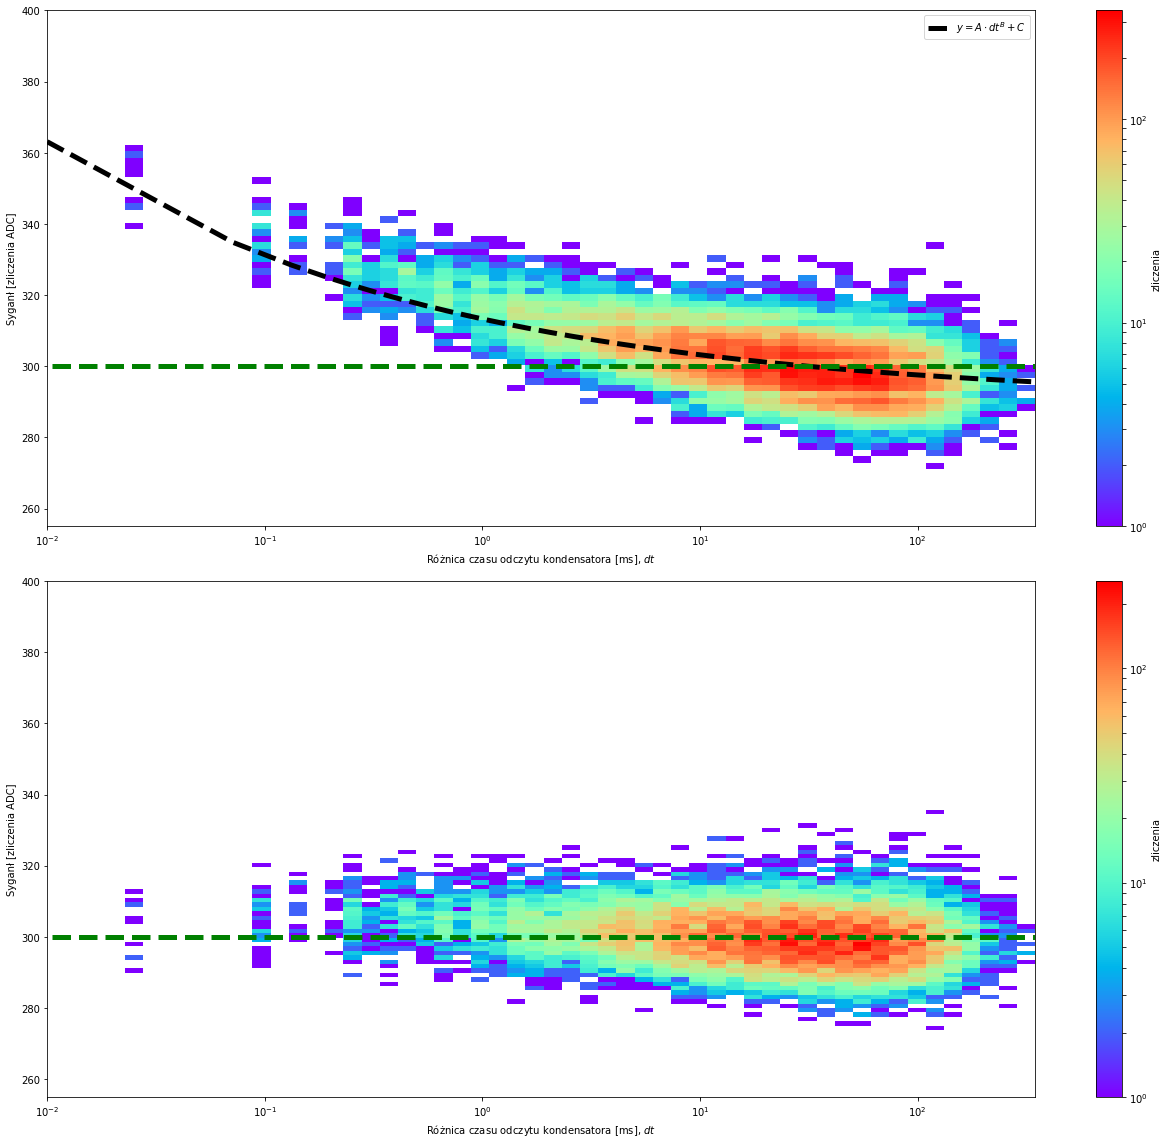

In [7]:
t = np.linspace(0.01, 800, 13000)
y = (23.03*np.power(t, -0.25) - 9.73) + 300

fig, ax = plt.subplots(2, 1, figsize=(18, 16))
counts, xedges, yedges, im = ax[0].hist2d(np.log10(dt), baseline, bins=50, norm=LogNorm(), cmap=plt.cm.rainbow)
ax[0].plot(np.log10(t), y, 'k--', lw=5, label="$y = A \cdot dt^B + C$")
ax[0].plot([-3, 40], [300, 300], 'g--', lw=5)
ax[0].set_xticks([-2, -1,0, 1, 2], ['$10^{-2}$', '$10^{-1}$', '$10^0$', '$10^1$', '$10^2$'])
ax[0].set_xticklabels(['$10^{-2}$', '$10^{-1}$', '$10^0$', '$10^1$', '$10^2$'])

ax[0].set_xlabel("Różnica czasu odczytu kondensatora [ms], $dt$")
ax[0].set_ylabel("Syganł [zliczenia ADC]")
ax[0].set_ylim([255, 400])
ax[0].legend()
plt.colorbar(im, ax=ax[0], label="zliczenia") 

counts, xedges, yedges, im = ax[1].hist2d(np.log10(dt), baseline_corr, bins=50, norm=LogNorm(), cmap=plt.cm.rainbow)
ax[1].plot([-3, 40], [300, 300], 'g--', lw=5)
ax[1].set_xticks([-2, -1,0, 1, 2], ['$10^{-2}$', '$10^{-1}$', '$10^0$', '$10^1$', '$10^2$'])
plt.colorbar(im, ax=ax[1], label="zliczenia") 
ax[1].set_xlabel("Różnica czasu odczytu kondensatora [ms], $dt$")
ax[1].set_ylabel("Syganł [zliczenia ADC]")
ax[1].set_xticks([-2, -1,0, 1, 2], ['$10^{-2}$', '$10^{-1}$', '$10^0$', '$10^1$', '$10^2$'])
ax[1].set_xticklabels(['$10^{-2}$', '$10^{-1}$', '$10^0$', '$10^1$', '$10^2$'])
ax[1].set_ylim([255, 400])
plt.tight_layout()

plt.savefig("/home/pawel1/Pulpit/Astrophysics/prezentacje/SMN2019/obrazy/dt_corr.pdf")

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-1.77360362, -1.68719555, -1.60078747, -1.51437939, -1.42797132,
        -1.34156324, -1.25515516, -1.16874709, -1.08233901, -0.99593093,
        -0.90952286, -0.82311478, -0.73670671, -0.65029863, -0.56389055,
        -0.47748248, -0.3910744 , -0.30466632, -0.21825825, -0.13185017,
        -0.04544209,  0.04096598,  0.12737406,  0.21378214,  0.30019021,
         0.38659829,  0.47300636,  0.55941444,  0.64582252,  0.73223059,
         0.81863867,  0.90504675,  0.99145482,  1.0778629 ,  1.16427098,
         1.25067905,  1.33708713,  1.42349521,  1.50990328,  1.59631136,
         1.68271943,  1.76912751,  1.85553559,  1.94194366,  2.02835174,
         2.11475982,  2.20116789,  2.28757597,  2.37398405,  2.46039212,
         2.5468002 ])

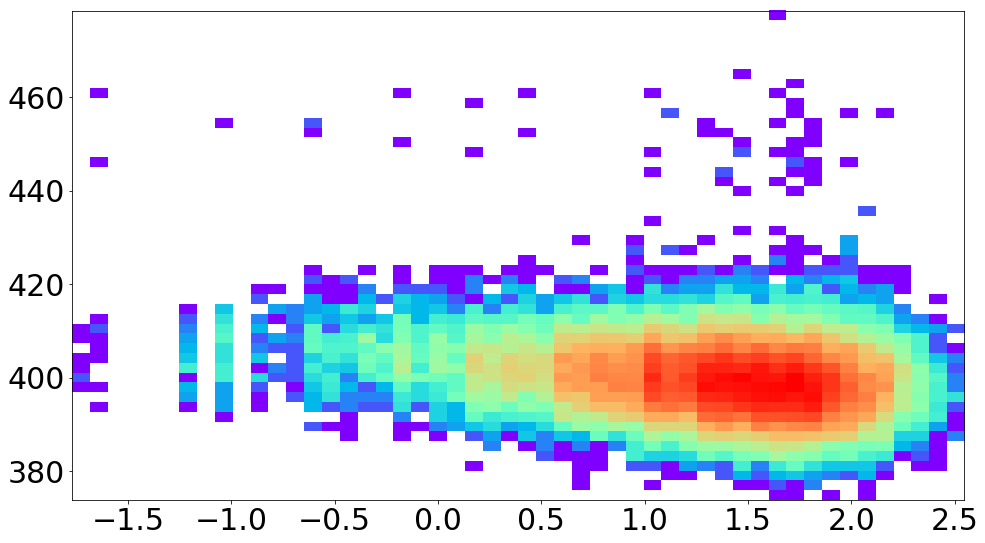

In [46]:
plt.figure(figsize=(16, 9))
plt.hist2d(np.log10(dt), baseline_corr, bins=50, norm=LogNorm(), cmap=plt.cm.rainbow)